In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9256\435000976.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\winequality-red.csv")

In [3]:
df.duplicated().sum()

240

In [4]:
df.drop_duplicates(ignore_index = True,inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

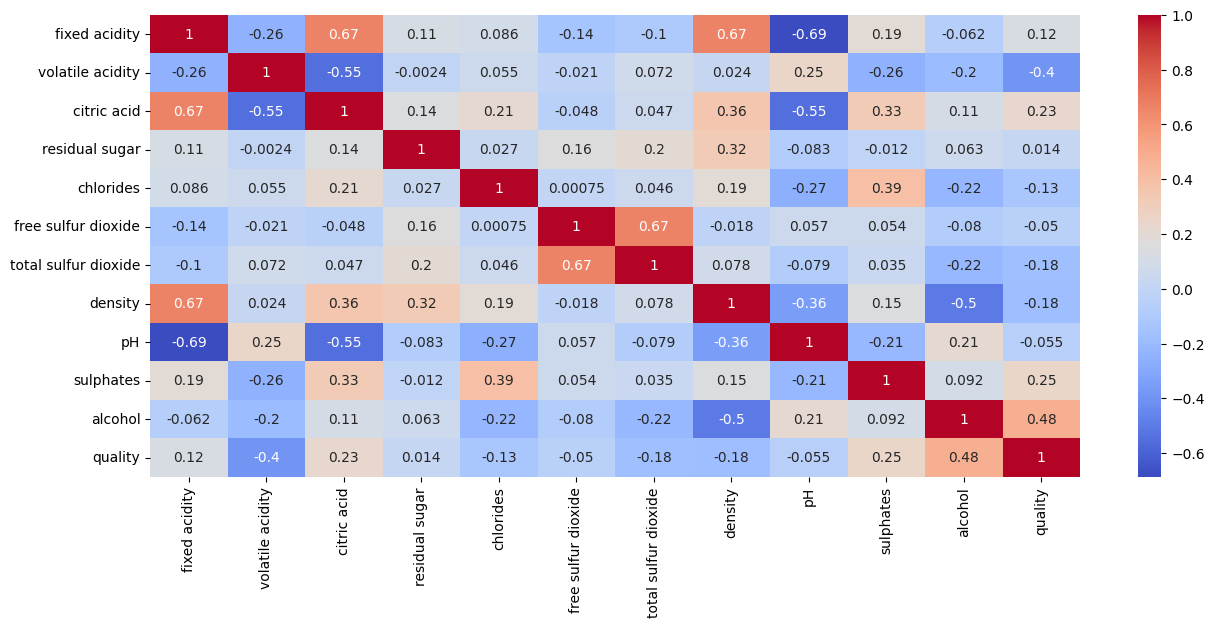

In [7]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

## columns describation 
- numerical -:
   -  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
   density,pH ,sulphates,alcohol

- categorial-:
  - quality


## univarite

In [8]:
def single(y,x):
    print(f'Discribe Five number summary in {x} columns: {y[x].describe()}')
    print(f'data Skwness: {y[x].skew()}')
    print(f'variance in this data: {y[x].var()}')
    plt.figure(figsize = (12,10))
    plt.subplot(2,2,1)
    print(sns.histplot(y[x],bins = 20))
    plt.subplot(2,2,2)
    print(sns.kdeplot(y[x]))
    plt.subplot(2,2,3)
    print(sns.boxplot(y[x]))
    plt.show()  

In [9]:
def find_outlier(y,x,con = 'Yes/No'):
    q3 = np.percentile(y[x],75) 
    q1  = np.percentile(y[x],25) 
    iqr = q3  - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5 * iqr
    if con == 'Yes':
        return ub,lb
    elif con == 'No':
        print(f'''25%tile: {q1} 
75%tile : {q3}''')
    print(f'Total Iqr {iqr}')
    print(f"""Lower Boundry: {lb}
upper boundry: {ub}""")
    print(f'{len(y[y[x] > ub].sort_values(by = x))/len(y[x]) *100}%tile outlier in this data(positive)')
    print(f'{len(y[y[x] < lb].sort_values(by = x,ascending = False))/len(y[x]) *100}%tile outlier in this data(negetive)')

In [10]:
def remove_outlier(y,x):
    upper,lower = find_outlier(y,x,con = 'Yes')
    df = y[(y[x] > lower) & (y[x] < upper)]
    return df

## fixed acidit
conclusion
- there some outlier in the data.but its all the valid
- its almost normal distributed
- maximum data above > 6 and below 10.this peak value of the data 

Discribe Five number summary in fixed acidity columns: count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
data Skwness: 0.9410413664561449
variance in this data: 3.0171335914716813
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



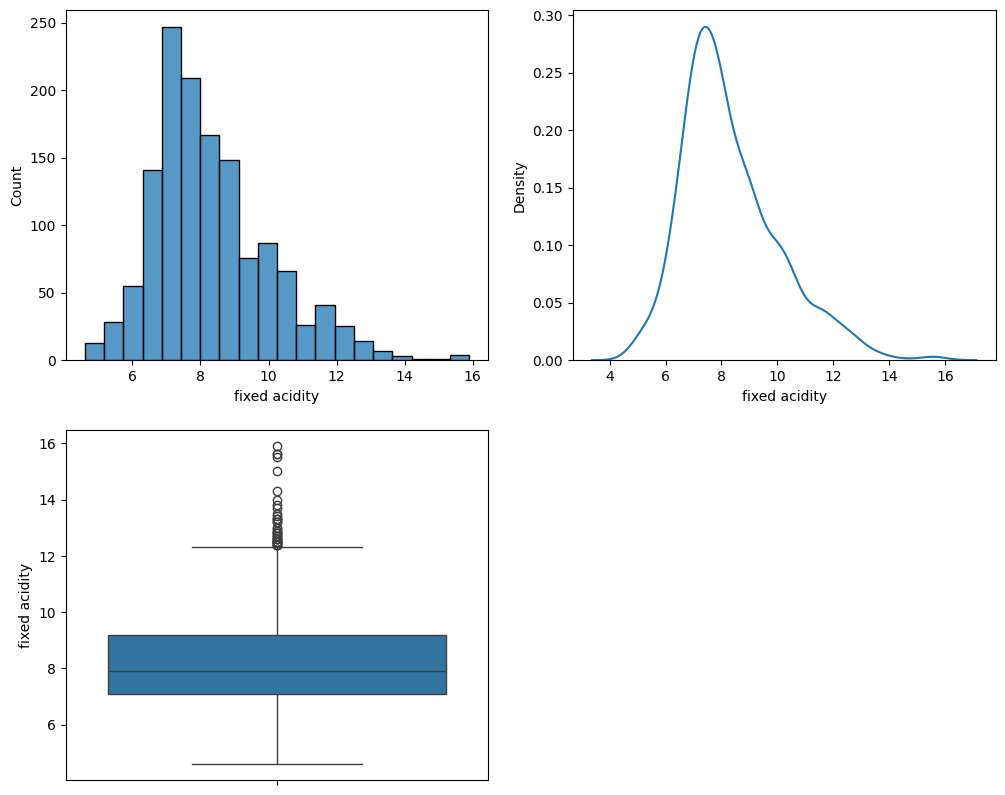

In [11]:
single(df,'fixed acidity')

In [12]:
find_outlier(df,'fixed acidity',con = 'NO')

Total Iqr 2.0999999999999996
Lower Boundry: 3.95
upper boundry: 12.349999999999998
3.016924208977189%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [13]:
df[df['fixed acidity'] > 13]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
214,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
255,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
285,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
302,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6
308,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
328,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
334,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6
385,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
444,13.3,0.290,0.75,2.8,0.084,23.0,43.0,0.99860,3.04,0.68,11.4,7
473,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6


In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## volatile acidity
conclusion
- there small quantity data positive skewed
- There are few outlier.the outlier is effected the fine qunlity (so i have remove the outlier)
- 75% data is below 0.640000

Discribe Five number summary in volatile acidity columns: count    1359.000000
mean        0.529478
std         0.183031
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
data Skwness: 0.7292789463991854
variance in this data: 0.033500463229373584
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



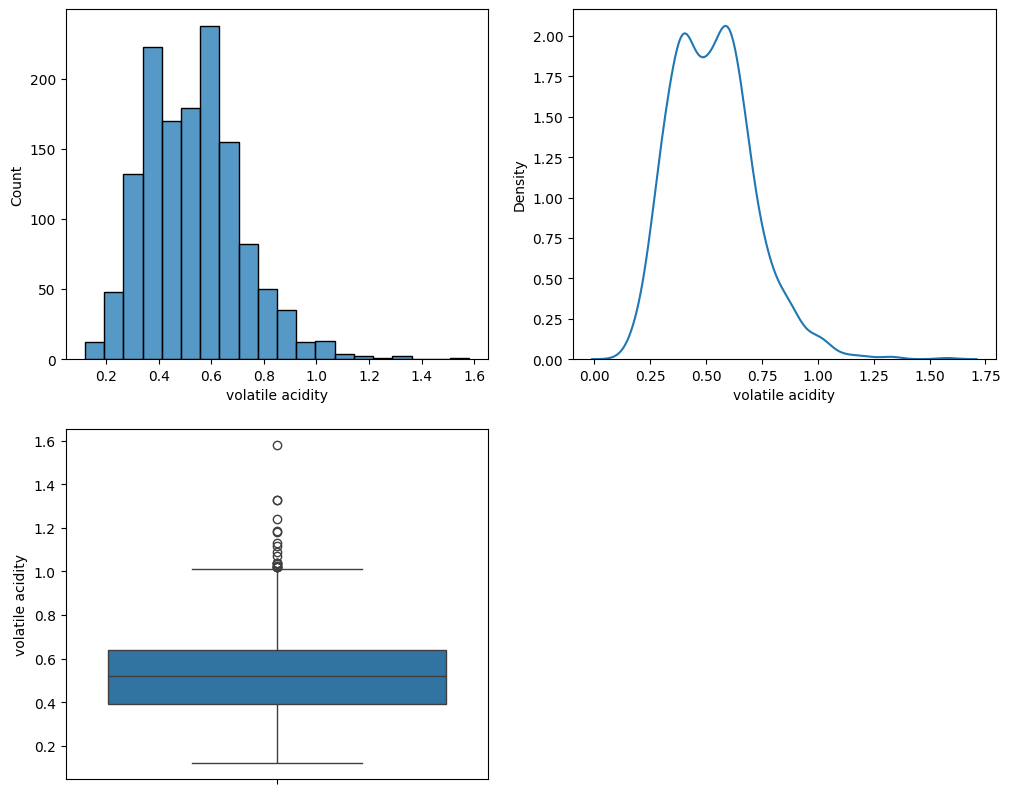

In [15]:
single(df,'volatile acidity')

In [16]:
find_outlier(df,'volatile acidity')

Total Iqr 0.25
Lower Boundry: 0.015000000000000013
upper boundry: 1.0150000000000001
1.398086828550405%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [17]:
df = remove_outlier(df,'volatile acidity')

In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## citric acid
conclusion 
- There are only one outlier on the data
- And the main think is upper limit is very closly on outlier so i think outlier not highly effect on the data
- there 99 % data is below < 0.8

Discribe Five number summary in citric acid columns: count    1340.000000
mean        0.274455
std         0.195403
min         0.000000
25%         0.100000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric acid, dtype: float64
data Skwness: 0.30207132942728904
variance in this data: 0.03818230195177957
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



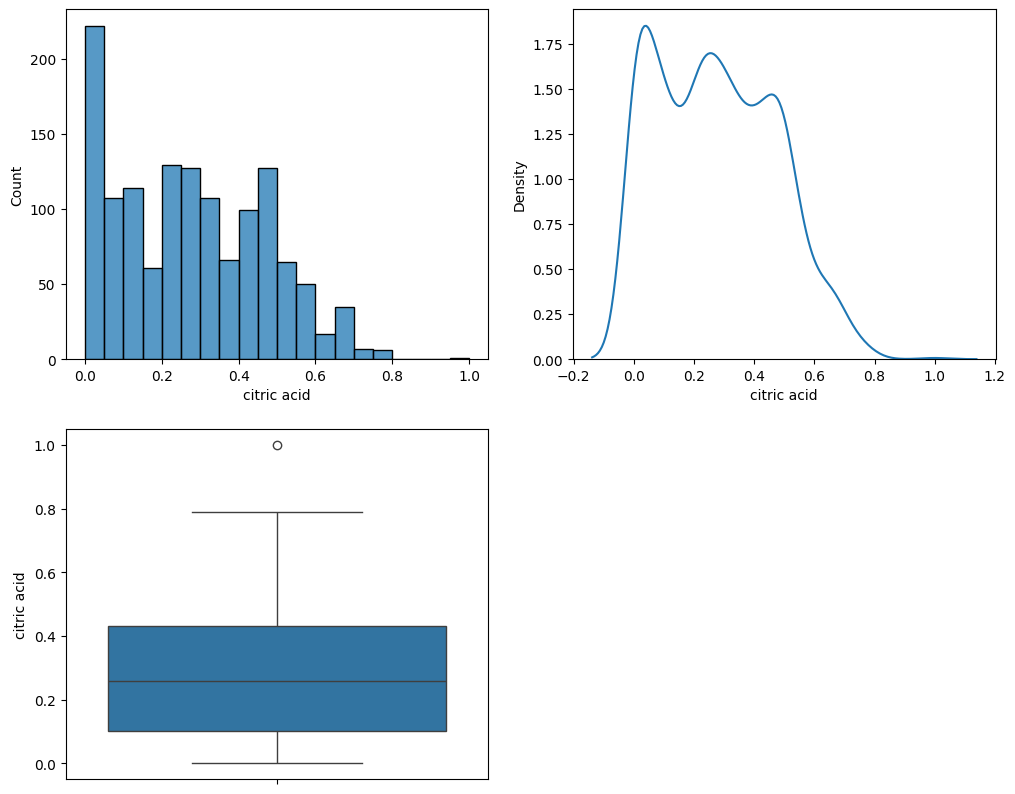

In [19]:
single(df,'citric acid')

In [20]:
find_outlier(df,'citric acid')

Total Iqr 0.32999999999999996
Lower Boundry: -0.3949999999999999
upper boundry: 0.9249999999999999
0.0746268656716418%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [21]:
df[df['citric acid'] > 0.8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
135,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


## residual sugar
conclusion
- There are so many outlier in the data
- Data is highly right skewed (positivly)
-  75% is data below 3

Discribe Five number summary in residual sugar columns: count    1340.000000
mean        2.524291
std         1.355587
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64
data Skwness: 4.564686365344724
variance in this data: 1.8376152550355018
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



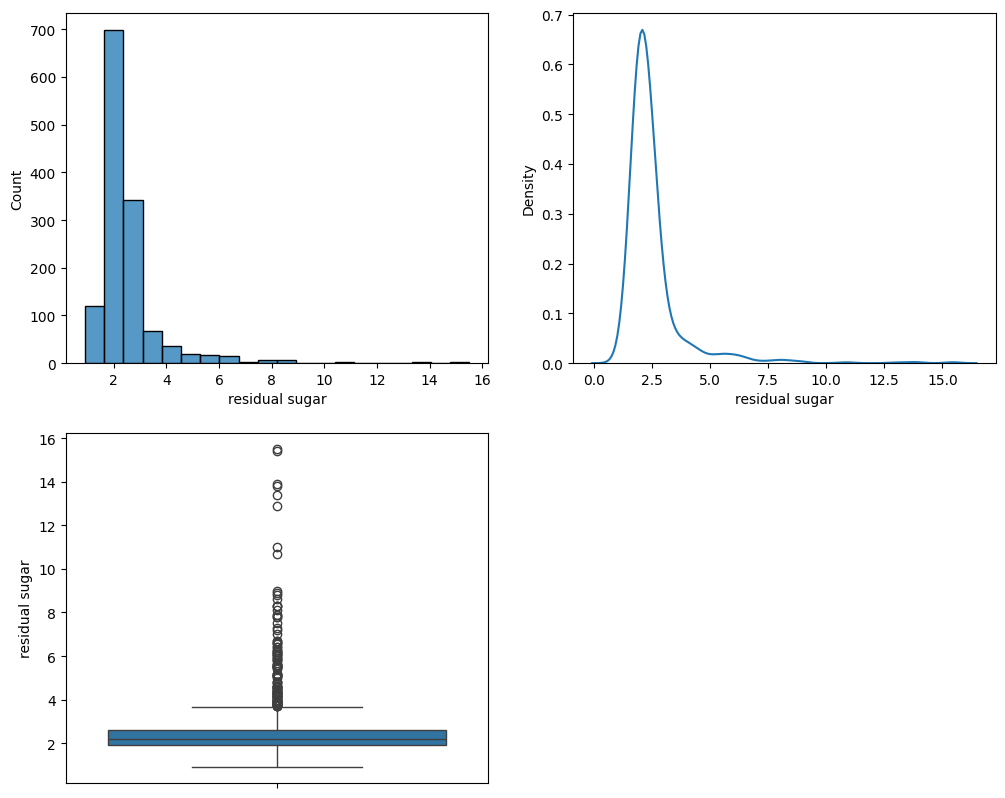

In [22]:
single(df,'residual sugar')

In [23]:
find_outlier(df,'residual sugar')

Total Iqr 0.7000000000000002
Lower Boundry: 0.8499999999999996
upper boundry: 3.6500000000000004
9.253731343283581%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [24]:
df = remove_outlier(df,'residual sugar')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## chlorides
conclusion
- there are so many outlier in the data
-  data is highly right skewed

Discribe Five number summary in chlorides columns: count    1216.000000
mean        0.087770
std         0.051038
min         0.012000
25%         0.069000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64
data Skwness: 5.52710136548299
variance in this data: 0.0026048325319471513
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



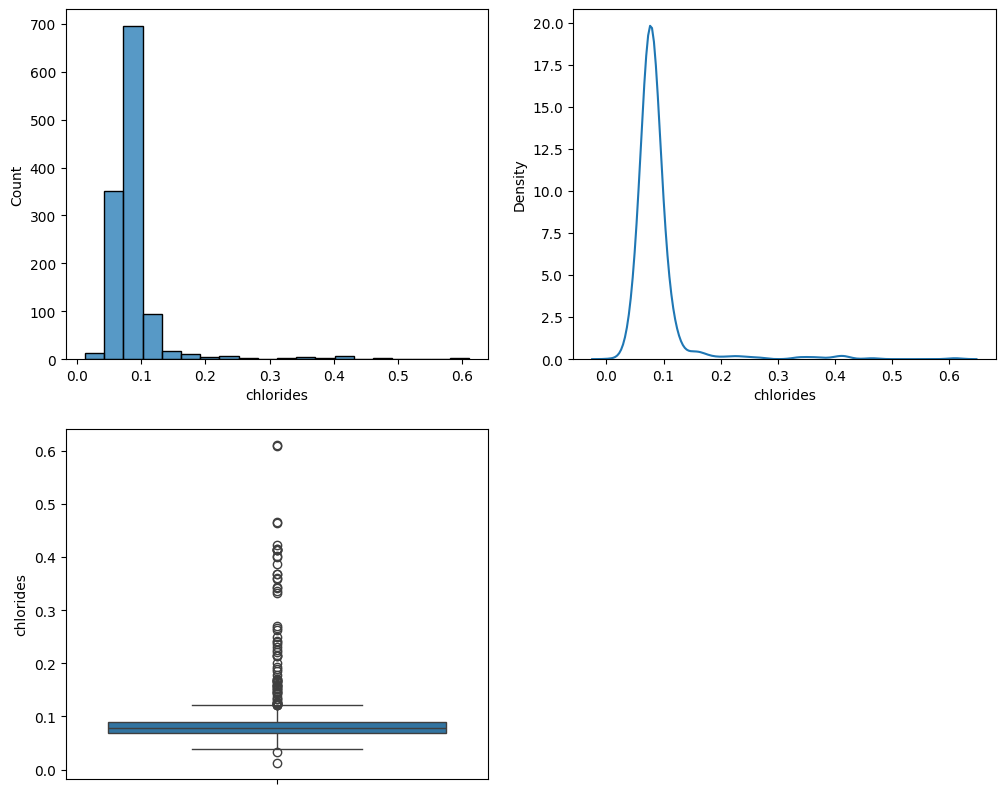

In [25]:
single(df,'chlorides')

In [26]:
find_outlier(df,'chlorides')

Total Iqr 0.02099999999999999
Lower Boundry: 0.03750000000000002
upper boundry: 0.12149999999999998
5.921052631578947%tile outlier in this data(positive)
0.1644736842105263%tile outlier in this data(negetive)


In [27]:
df = remove_outlier(df,'chlorides')

In [28]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## free sulfur dioxide
conclusion
- There are almost normal distributed there are few outlier and its valid
- mostly data variance is normally

Discribe Five number summary in free sulfur dioxide columns: count    1142.000000
mean       15.753503
std         9.784302
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        57.000000
Name: free sulfur dioxide, dtype: float64
data Skwness: 1.0316274355712258
variance in this data: 95.7325687900895
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



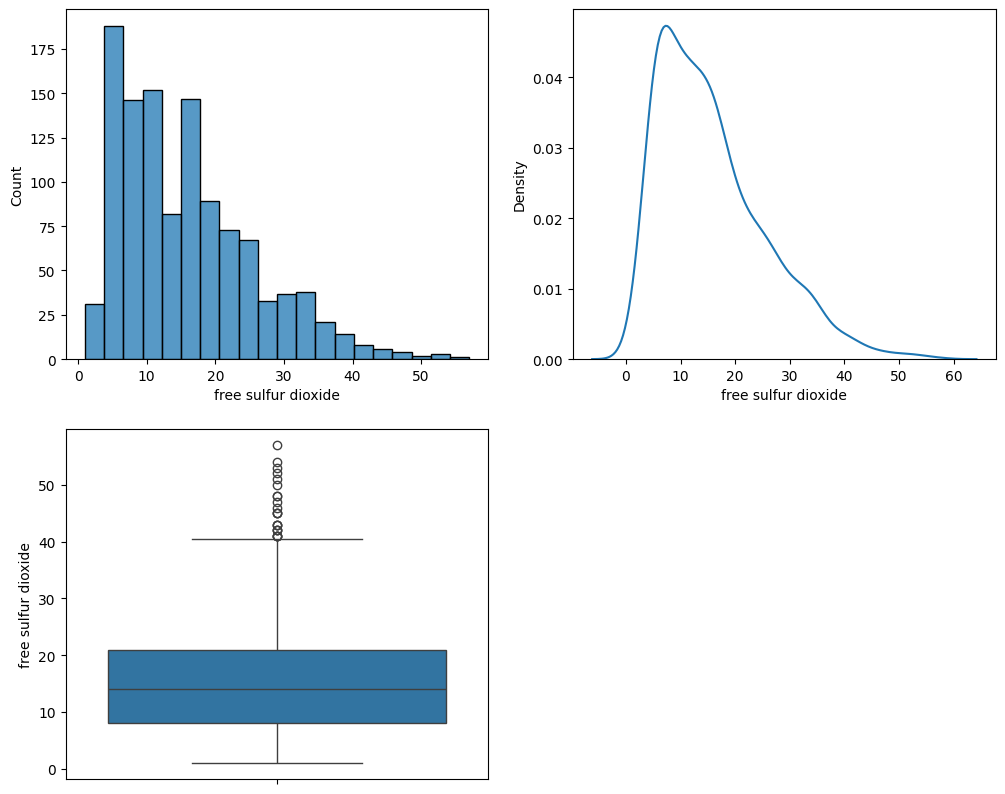

In [29]:
single(df,'free sulfur dioxide')

In [30]:
find_outlier(df,'free sulfur dioxide')

Total Iqr 13.0
Lower Boundry: -11.5
upper boundry: 40.5
2.0140105078809105%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [31]:
df[df['free sulfur dioxide'] > 40.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
84,7.9,0.520,0.26,1.90,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
436,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
455,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
489,9.0,0.540,0.49,2.90,0.094,41.0,110.0,0.99820,3.08,0.61,9.2,5
506,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
550,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
586,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5
735,9.3,0.360,0.39,1.50,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
791,8.6,0.220,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7
792,9.4,0.240,0.33,2.30,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6


## total sulfur dioxide
conclusion
- there are so many outlier  in the data.data varriance is too high in the upper limit
- data is positive skewed

Discribe Five number summary in total sulfur dioxide columns: count    1142.000000
mean       45.591944
std        30.971954
min         6.000000
25%        23.000000
50%        37.000000
75%        60.000000
max       165.000000
Name: total sulfur dioxide, dtype: float64
data Skwness: 1.2207005478140018
variance in this data: 959.2619157619748
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



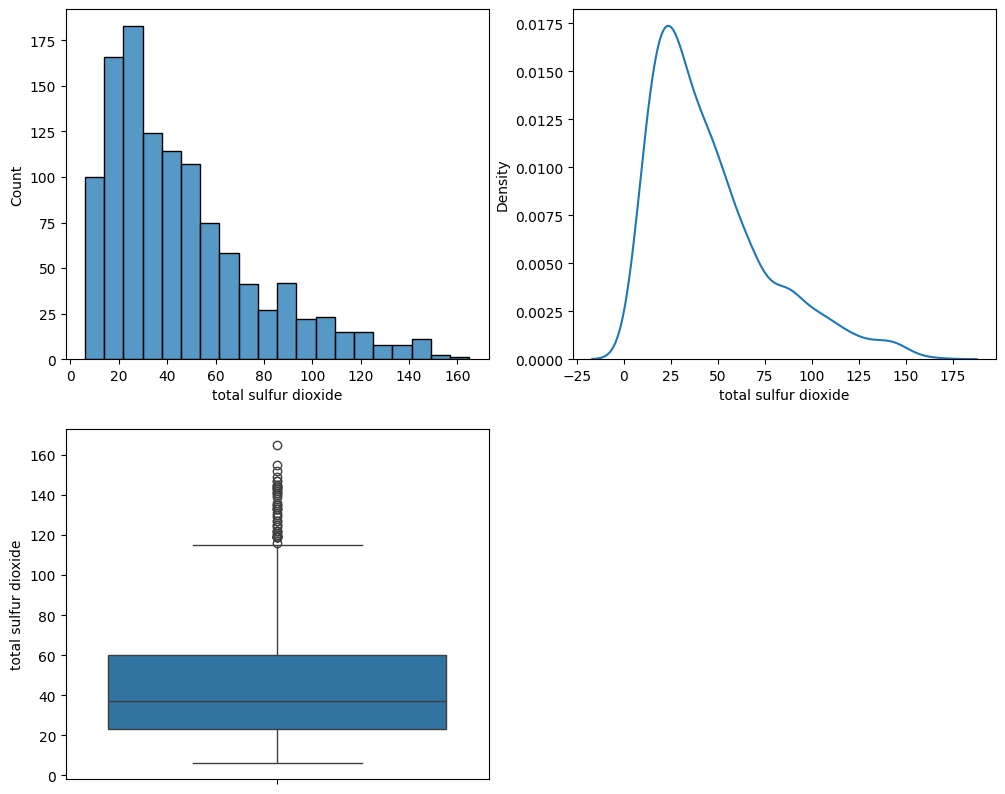

In [32]:
single(df,'total sulfur dioxide')

In [33]:
find_outlier(df,'total sulfur dioxide')

Total Iqr 37.0
Lower Boundry: -32.5
upper boundry: 115.5
4.028021015761821%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [34]:
df = remove_outlier(df,'total sulfur dioxide')

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## density
conclusion
- there are all outlier closly on upper limit and lower limit 
- data is almost normally distribute 


Discribe Five number summary in density columns: count    1096.000000
mean        0.996547
std         0.001784
min         0.990070
25%         0.995470
50%         0.996560
75%         0.997600
max         1.001400
Name: density, dtype: float64
data Skwness: -0.08503037958050359
variance in this data: 3.1817715374295827e-06
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



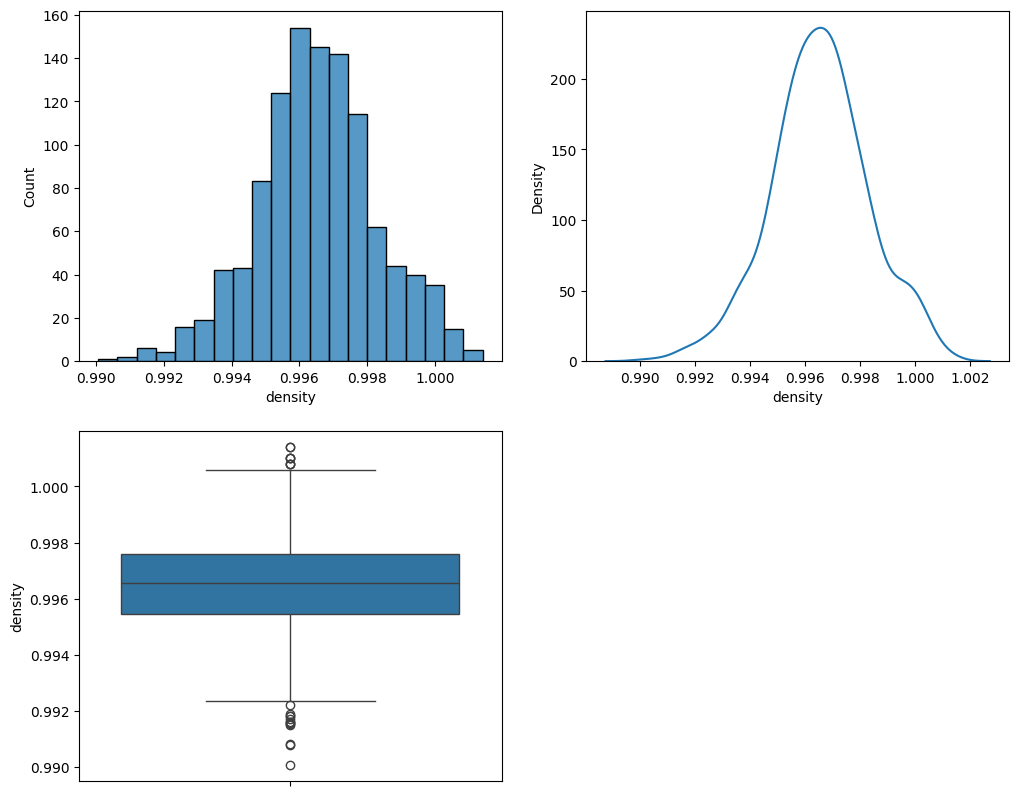

In [36]:
single(df,'density')

In [37]:
find_outlier(df,'density')

Total Iqr 0.0021300000000000763
Lower Boundry: 0.9922749999999998
upper boundry: 1.000795
0.7299270072992701%tile outlier in this data(positive)
1.1861313868613137%tile outlier in this data(negetive)


In [38]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## pH 
conclusion
- There are some outlier in the data.but its valid .not seroius effacted on the data
- data is almost normally distribute 


Discribe Five number summary in pH columns: count    1096.000000
mean        3.322126
std         0.149879
min         2.860000
25%         3.220000
50%         3.320000
75%         3.410000
max         4.010000
Name: pH, dtype: float64
data Skwness: 0.30181130754649493
variance in this data: 0.022463695547111955
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



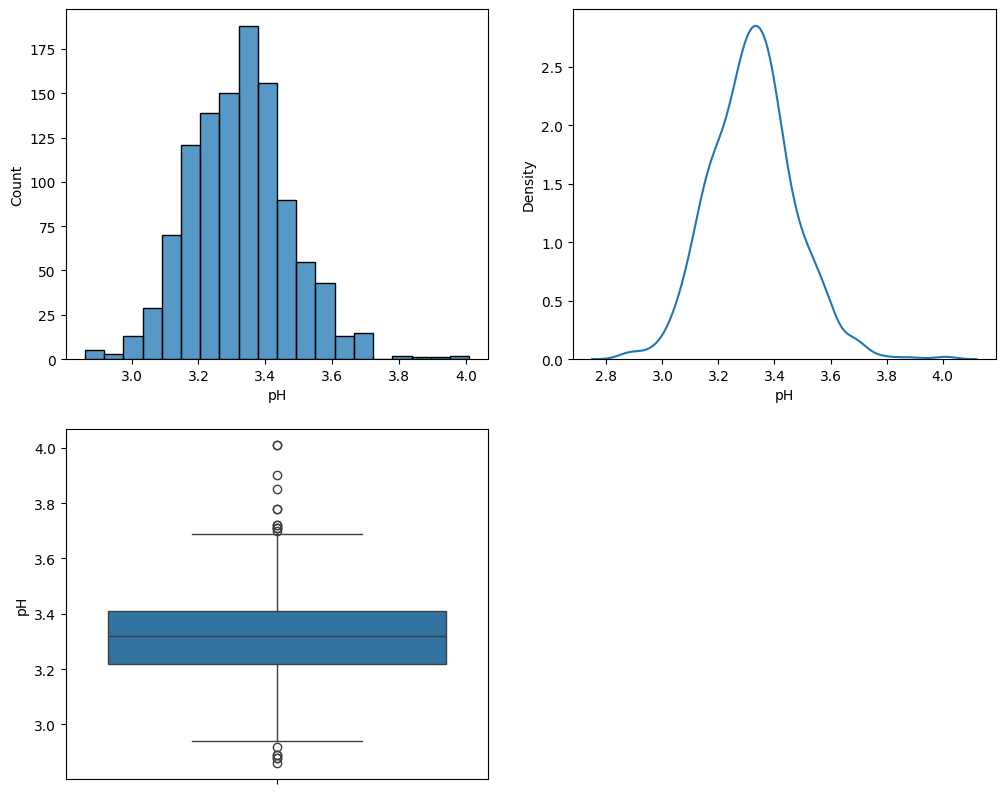

In [39]:
single(df,'pH')

In [40]:
find_outlier(df,'pH')

Total Iqr 0.18999999999999995
Lower Boundry: 2.9350000000000005
upper boundry: 3.6950000000000003
1.094890510948905%tile outlier in this data(positive)
0.5474452554744526%tile outlier in this data(negetive)


In [41]:
df[(df['pH'] < 2.9350000000000005)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
383,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
473,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
563,10.7,0.43,0.39,2.2,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5
569,12.0,0.50,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7
866,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
1246,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5


## sulphates
conclusion


Discribe Five number summary in sulphates columns: count    1096.000000
mean        0.644918
std         0.134960
min         0.330000
25%         0.550000
50%         0.620000
75%         0.720000
max         1.560000
Name: sulphates, dtype: float64
data Skwness: 1.322549402679372
variance in this data: 0.018214239826017397
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


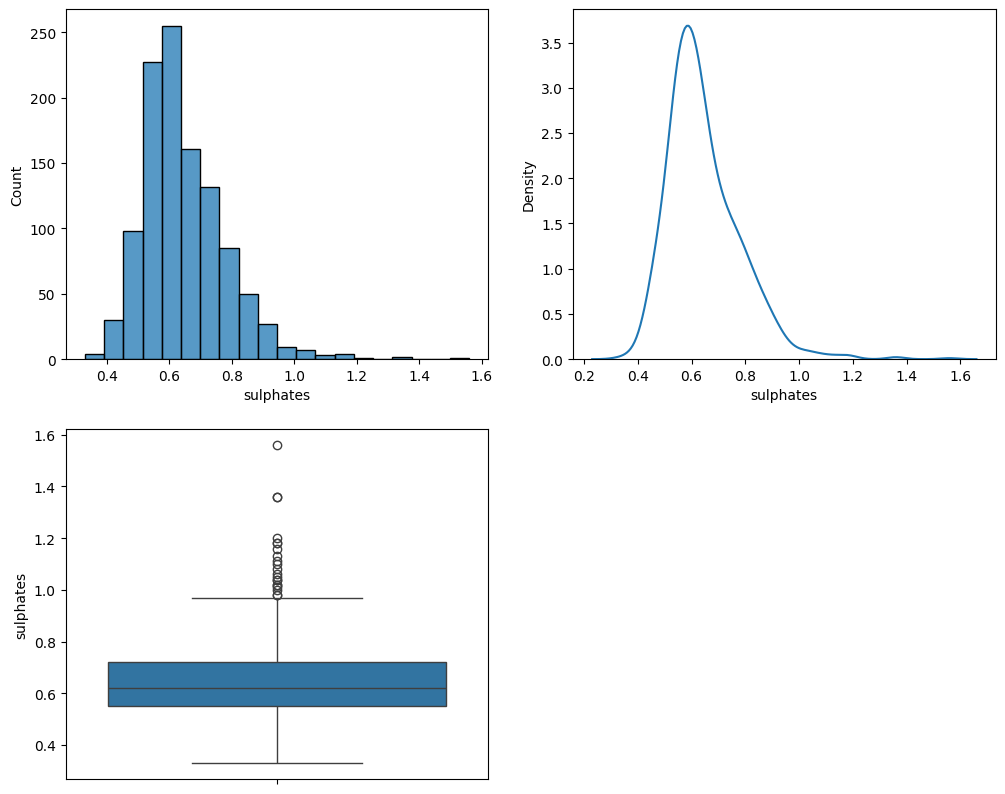

In [42]:
single(df,'sulphates')

In [43]:
find_outlier(df,'sulphates')

Total Iqr 0.16999999999999993
Lower Boundry: 0.29500000000000015
upper boundry: 0.9749999999999999
1.916058394160584%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [44]:
df = remove_outlier(df,'sulphates')

In [45]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## alcohol
conclusion
- there are some outlier in the data some outlier in the but few outliers are valid and some outlier is higly effect so.i have remove the this outlier
- all is good .data distribution is almost normall 

Discribe Five number summary in alcohol columns: count    1075.000000
mean       10.453550
std         1.061807
min         8.400000
25%         9.600000
50%        10.200000
75%        11.100000
max        14.000000
Name: alcohol, dtype: float64
data Skwness: 0.8537065701038833
variance in this data: 1.1274338448361316
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



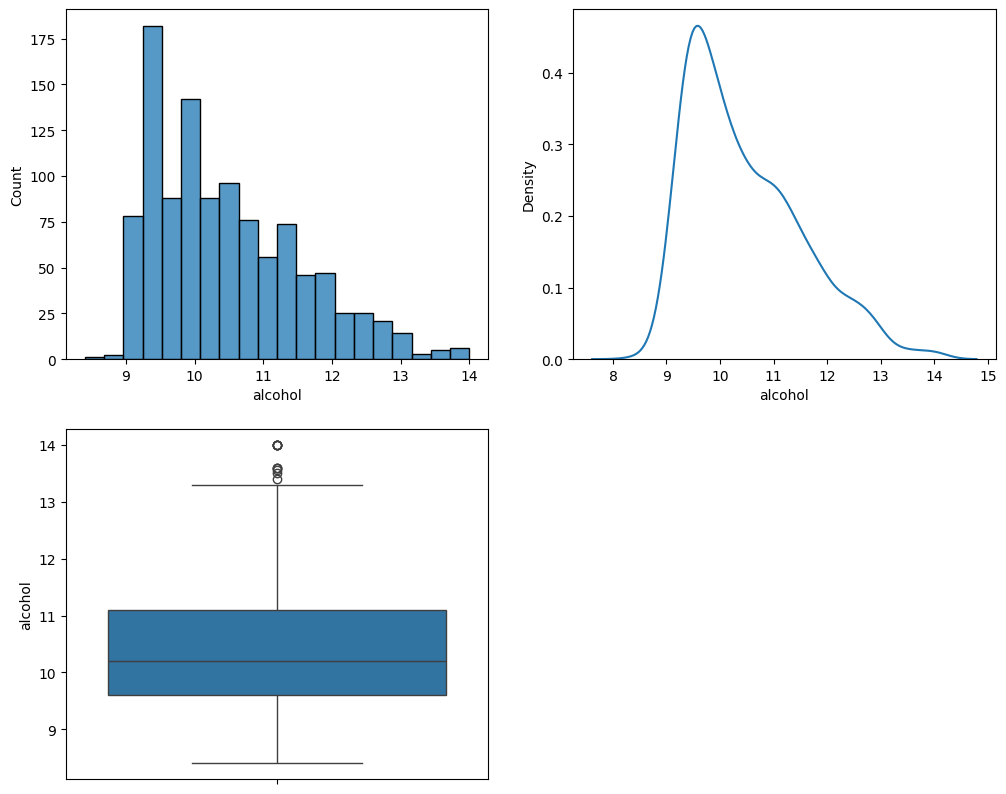

In [46]:
single(df,'alcohol')

In [47]:
find_outlier(df,'alcohol')

Total Iqr 1.5
Lower Boundry: 7.35
upper boundry: 13.35
1.1162790697674418%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [48]:
df[df['alcohol'] > 13.35]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
127,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
408,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
431,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.400000,7
510,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
710,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
958,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.500000,6
964,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1046,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1081,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1082,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6


In [49]:
d = list(df[df['alcohol'] == 14.000000].index)
df.drop(d,axis = 0,inplace = True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9256\3526402493.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
def cate(y,x):
    f = y[x].value_counts()
    print(f)
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    ax = sns.countplot(x = y[x])
    plt.subplot(1,2,2)
    l = f.index
    plt.pie(f,labels = l,autopct = '%0.1f%%')


## quality
conclusion
- mostly peoples is given quality rating is 5 and 6
- These  two points are taking more than 40 - 40% per share in the quality

quality
6    453
5    437
7    130
4     34
8     12
3      3
Name: count, dtype: int64


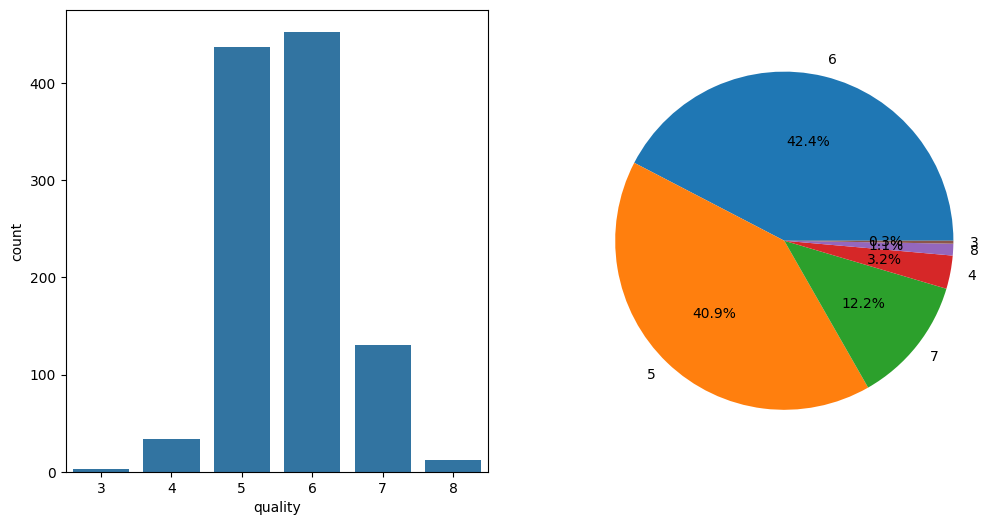

In [51]:
cate(df,'quality')

## re alanysis
- volatile acidity
- residual sugar
- chlorides
- total sulfur dioxide
- sulphates
- alcohol

 ## volatile acidity
- there few outlier in but its valid.beacuse i already remove all the harmfull outlier in the data
- data  distribution is almost normall

Discribe Five number summary in volatile acidity columns: count    1069.000000
mean        0.518531
std         0.168303
min         0.120000
25%         0.390000
50%         0.520000
75%         0.630000
max         1.010000
Name: volatile acidity, dtype: float64
data Skwness: 0.32574609090992107
variance in this data: 0.028325977715530984
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



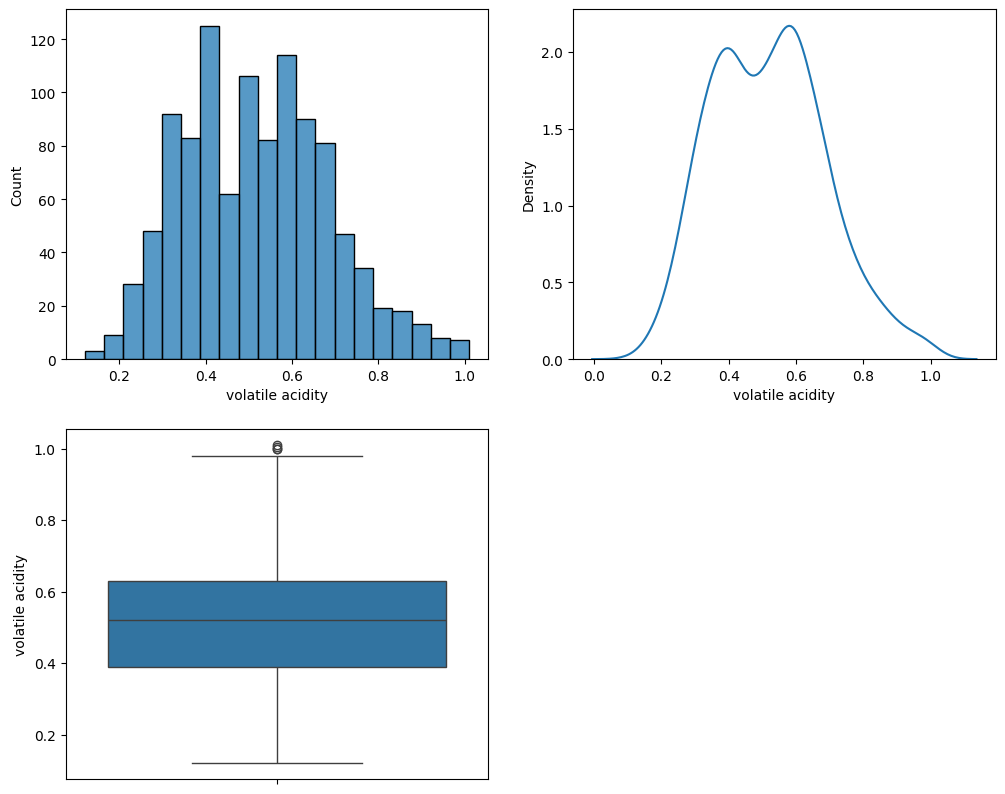

In [52]:
single(df,'volatile acidity')

## residual sugar
conclusion 
- data  constatancy is increase.after remove the outlier
-  all is good 

Discribe Five number summary in residual sugar columns: count    1069.000000
mean        2.193592
std         0.454239
min         0.900000
25%         1.900000
50%         2.100000
75%         2.500000
max         3.650000
Name: residual sugar, dtype: float64
data Skwness: 0.5625295946395323
variance in this data: 0.20633296458239175
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


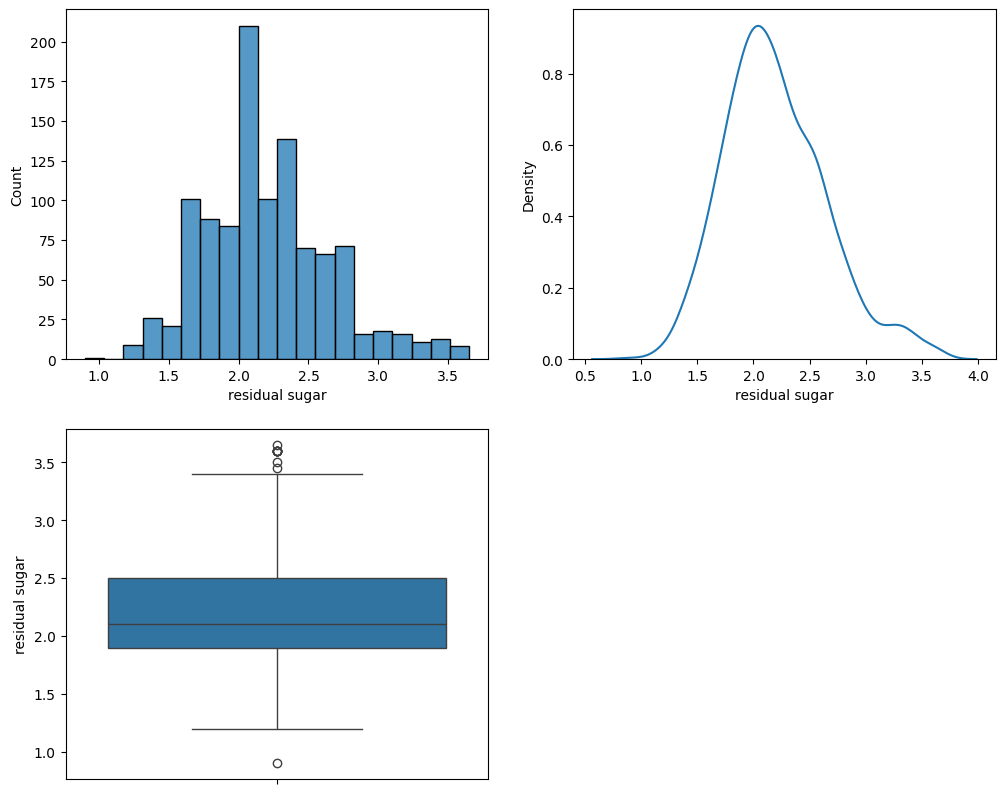

In [53]:
single(df,'residual sugar')

## chlorides
conclusion
- there are left few outlier in the data but is valid assumption
- data distribution is almost normally.

Discribe Five number summary in chlorides columns: count    1069.000000
mean        0.077921
std         0.015004
min         0.038000
25%         0.068000
50%         0.078000
75%         0.087000
max         0.121000
Name: chlorides, dtype: float64
data Skwness: 0.13904291232895888
variance in this data: 0.00022510992456809713
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



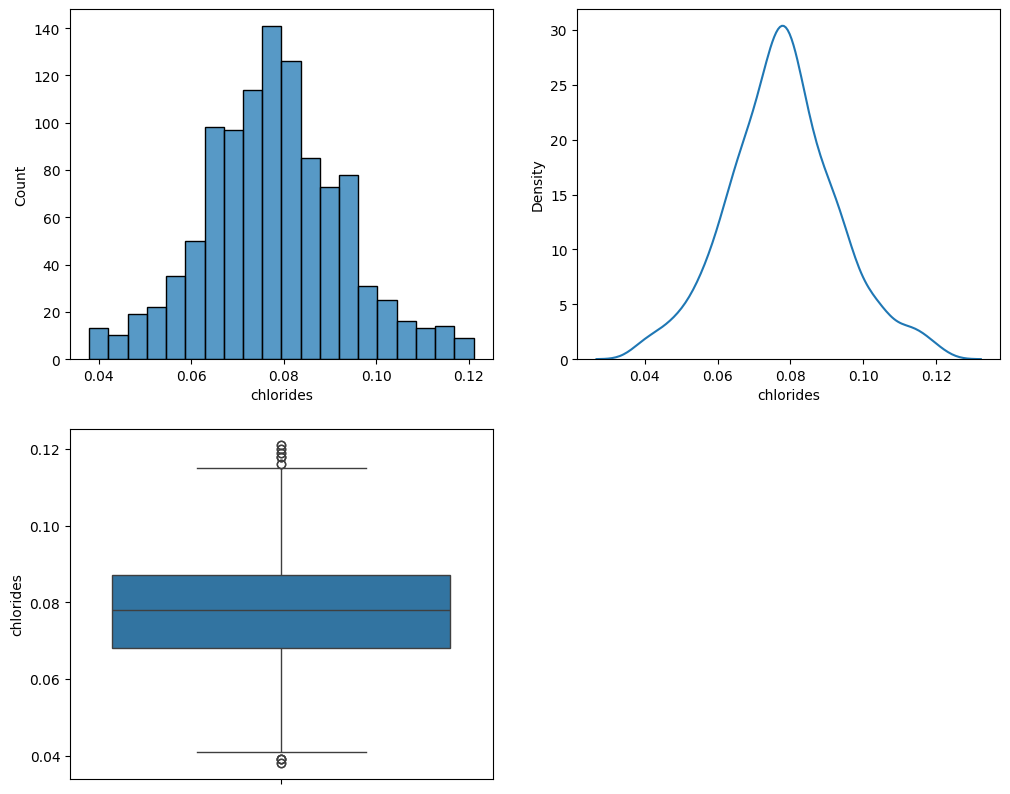

In [54]:
single(df,'chlorides')

## total sulfur dioxide
conclusion
- there are is under the upper limit so its not harmfull on at time 
-  data is some right(positive) skwed.then after remove all the outlier 

Discribe Five number summary in total sulfur dioxide columns: count    1069.000000
mean       41.874649
std        25.632873
min         6.000000
25%        22.000000
50%        36.000000
75%        56.000000
max       115.000000
Name: total sulfur dioxide, dtype: float64
data Skwness: 0.8919663763338787
variance in this data: 657.0441975594118
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


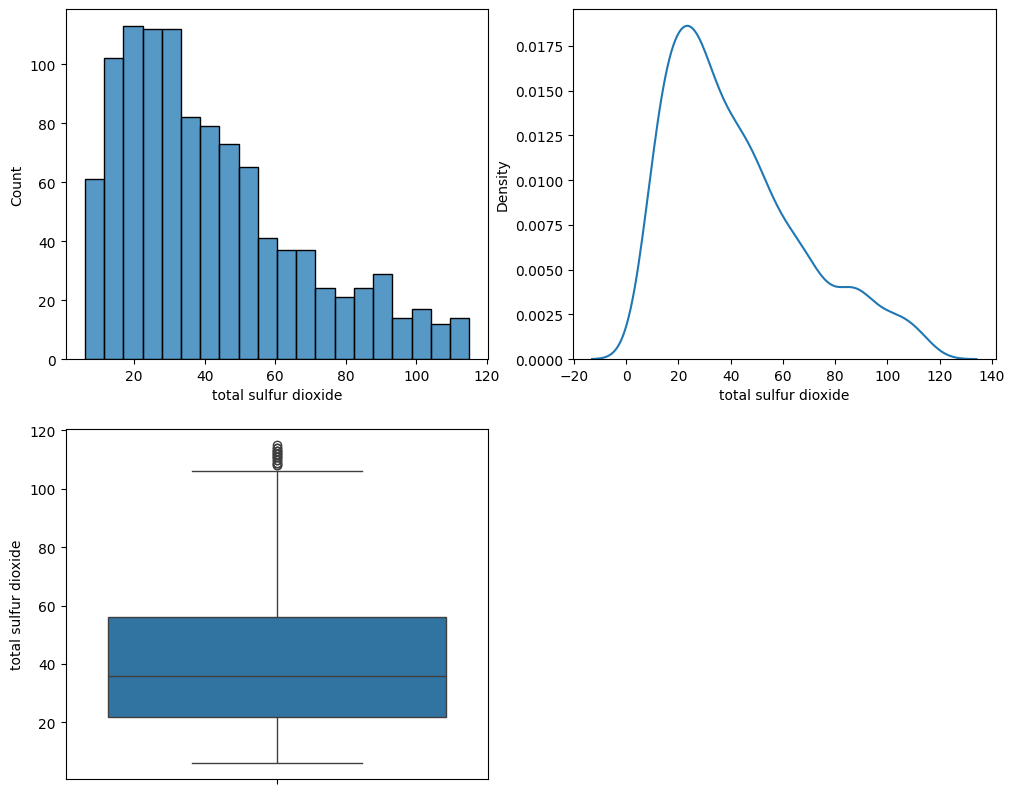

In [55]:
single(df,'total sulfur dioxide')

## sulphates
conclusion
- there are no outlier in the data
- data is almost normally distributed

Discribe Five number summary in sulphates columns: count    1069.000000
mean        0.634780
std         0.116378
min         0.330000
25%         0.550000
50%         0.620000
75%         0.710000
max         0.970000
Name: sulphates, dtype: float64
data Skwness: 0.5603835846024594
variance in this data: 0.013543888894728174
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



Axes(0.125,0.11;0.352273x0.35)


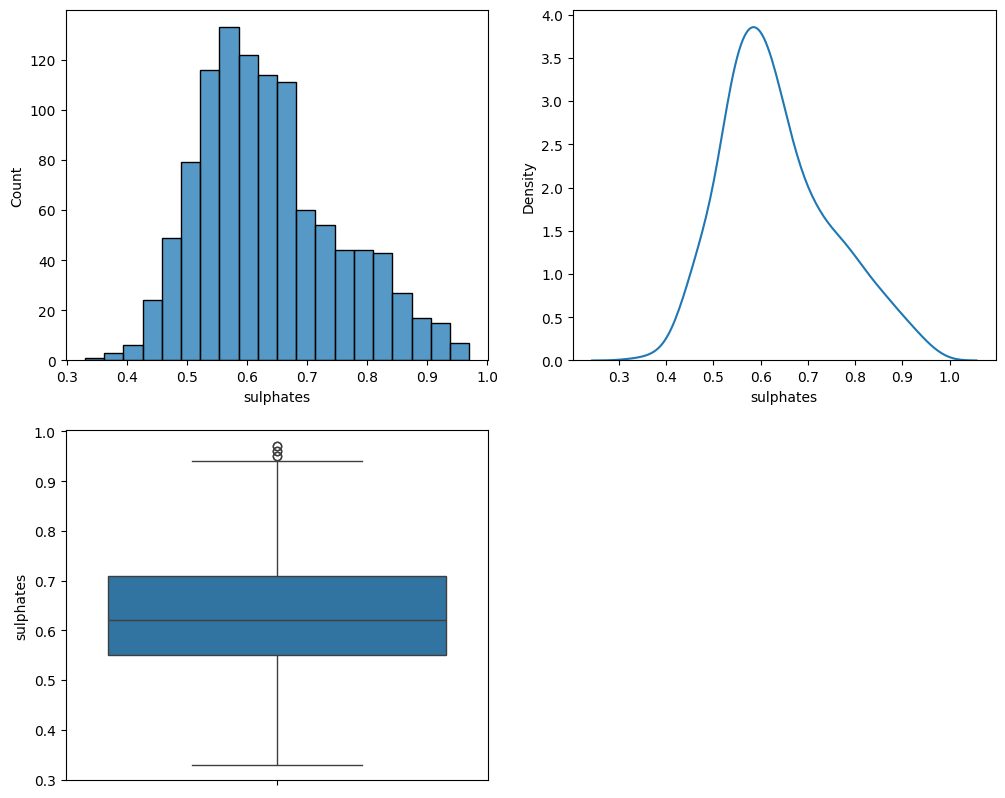

In [56]:
single(df,'sulphates')

## alcohol
conclusion
- there are few outlier but .its valid
- its almost normally distributed 

Discribe Five number summary in alcohol columns: count    1069.000000
mean       10.433645
std         1.030879
min         8.400000
25%         9.600000
50%        10.200000
75%        11.100000
max        13.600000
Name: alcohol, dtype: float64
data Skwness: 0.7669982597322891
variance in this data: 1.0627121373851756
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



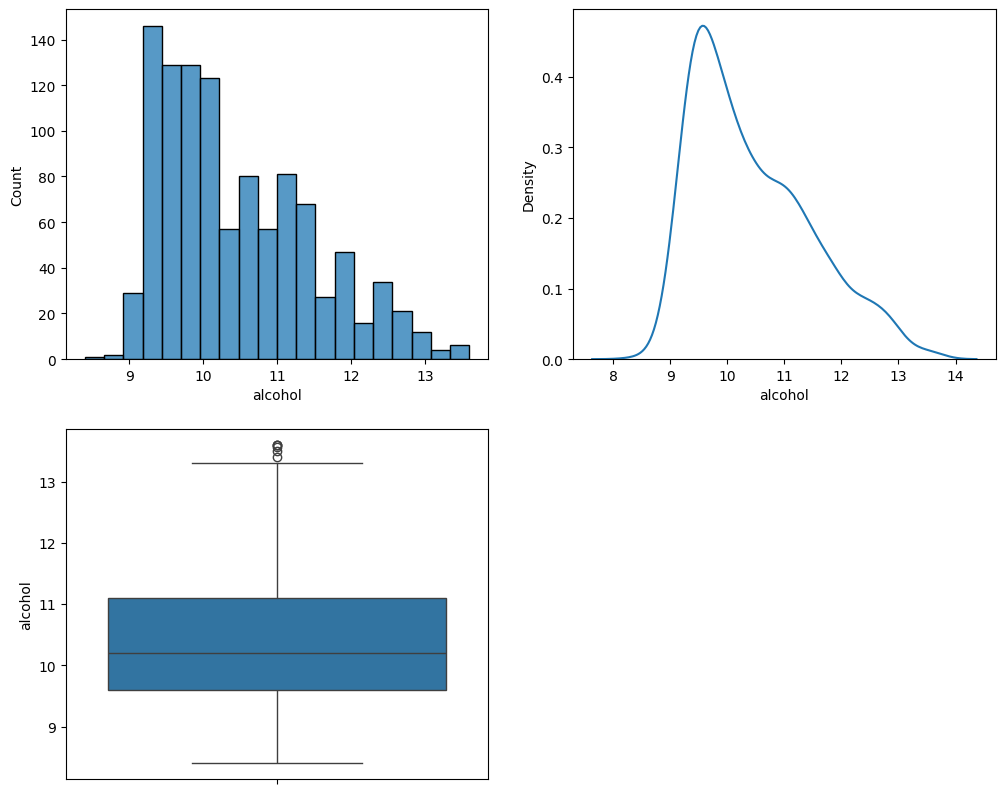

In [57]:
single(df,'alcohol')

## biariariat

In [58]:
def bia(a,b,c,z):
    plt.figure(figsize = (18,10))
    plt.subplot(2,2,1)
    sns.scatterplot(x = a[b],y = a[c])
    plt.subplot(2,2,2)
    sns.heatmap(z,annot = True,cmap = 'coolwarm');
    plt.subplot(2,2,3)
    sns.countplot(x = a[c]);
    plt.show()

## quality to fixed acidity 1
conclusion
- mostly good quality.when fixed acidity range 7-8.mostly people are given 8 no of rating in the wine
- range 8-9 is the good but more effective on 7-8 

In [59]:
def fa(data):
    if 4<= data < 5 : return '4-5'
    elif 5 <= data <6 : return '5-6'
    elif 6 <= data <7 : return '6-7'
    elif 7 <= data <8 : return '7-8'
    elif 8 <= data <9 : return '8-9'
    elif 9 <= data <10 : return '9-10'
    elif 10 <= data <11 : return '10-11'
    elif 11 <= data <12 : return '11-12'
    elif 12 <= data <13 : return '12-13'
    elif 13 <= data <14 : return '13-14'
    elif 14 <= data < 15 : return '14-15'
    else: return 'more than 15'
df['fixed acidity 1'] = df['fixed acidity'].apply(fa)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9256\3529607156.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



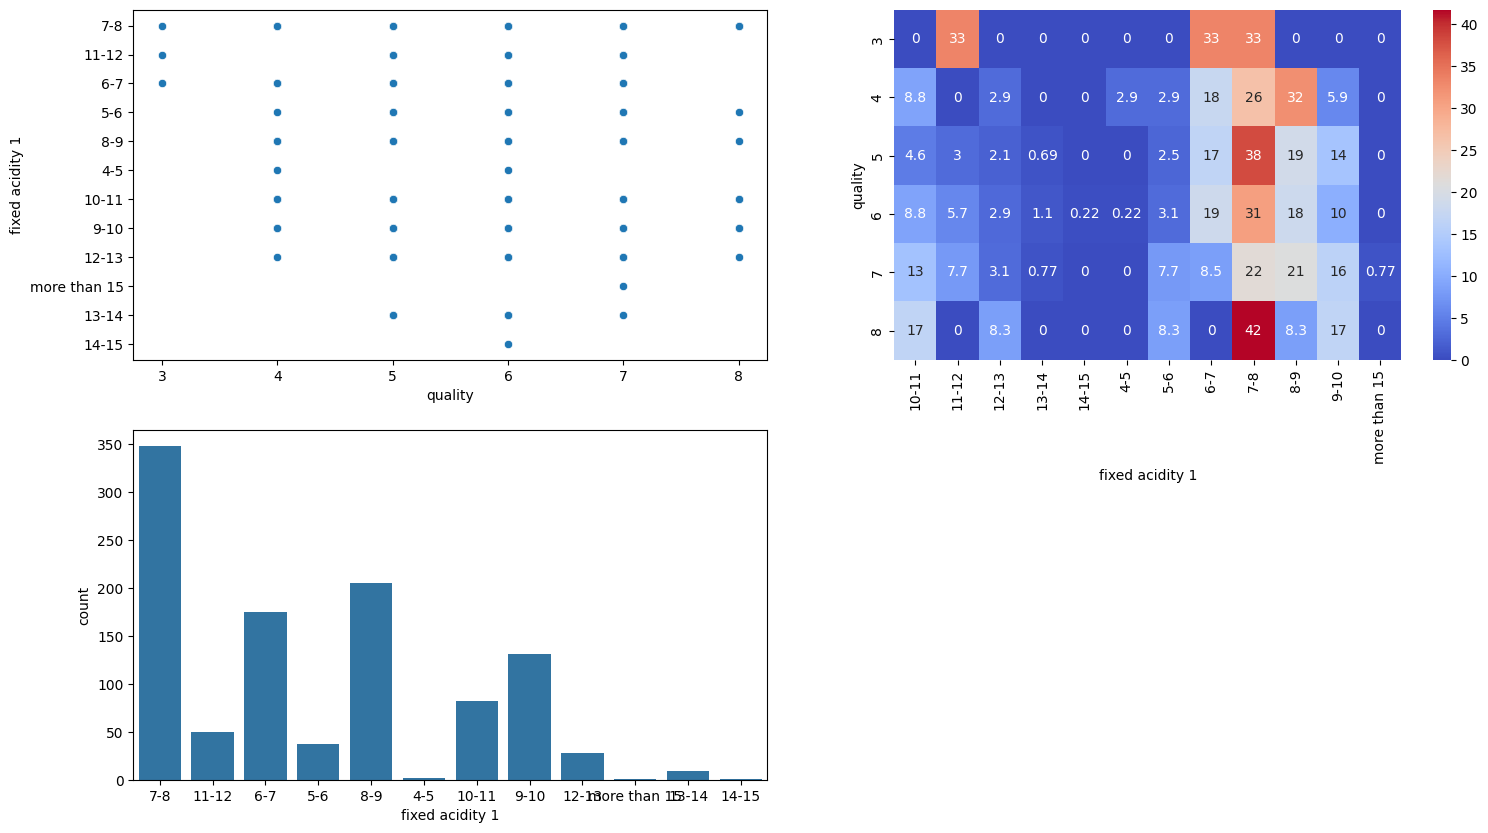

fixed acidity 1,10-11,11-12,12-13,13-14,14-15,4-5,5-6,6-7,7-8,8-9,9-10,more than 15
quality,,,,,,,,,,,,
3,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,33.333333,0.000000,0.000000,0.000000
4,8.823529,0.000000,2.941176,0.000000,0.000000,2.941176,2.941176,17.647059,26.470588,32.352941,5.882353,0.000000
5,4.576659,2.974828,2.059497,0.686499,0.000000,0.000000,2.517162,16.704805,37.986270,18.993135,13.501144,0.000000
6,8.830022,5.739514,2.869757,1.103753,0.220751,0.220751,3.090508,18.543046,30.684327,18.322296,10.375276,0.000000
7,13.076923,7.692308,3.076923,0.769231,0.000000,0.000000,7.692308,8.461538,21.538462,20.769231,16.153846,0.769231
8,16.666667,0.000000,8.333333,0.000000,0.000000,0.000000,8.333333,0.000000,41.666667,8.333333,16.666667,0.000000


In [60]:
b = pd.crosstab(df['quality'],df['fixed acidity 1'],normalize = 'index')*100
bia(df,'quality','fixed acidity 1',b)
b

## quality To 'fixed acidity'
conclusion 
- there are almost same avgeare fixed acidity mean on show


<Axes: xlabel='quality'>

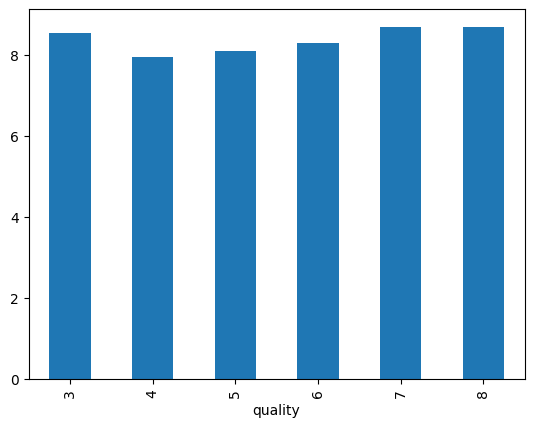

In [61]:
d = df.groupby('quality')['fixed acidity'].mean()
d.plot(kind ='bar')


In [62]:
def num_cat(y,x):
    subset = y.groupby('quality')[x].mean().reset_index()
    print(subset)
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.heatmap(subset,cmap = 'coolwarm',annot = True)
    ## Plotting KDE for each quality level separately
    for quality in subset['quality']:
        plt.subplot(1,2,2)
        sns.kdeplot(df[df['quality'] == quality][x], label= f'Quality {quality}')
    
    plt.xlabel(f'{x} Content')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate of {x} Content by Quality')
    plt.legend(title='Quality')
    plt.show()
       

## quality to alcohle
conclusion
- there are 6  type rating.but mostly people are give the 5 rating alcohol quantity average on 9 - 10(approxmtly)
- increase alcohol to increase the wine quality

   quality    alcohol
0        3   9.550000
1        4  10.092647
2        5   9.911899
3        6  10.634327
4        7  11.463205
5        8  11.891667


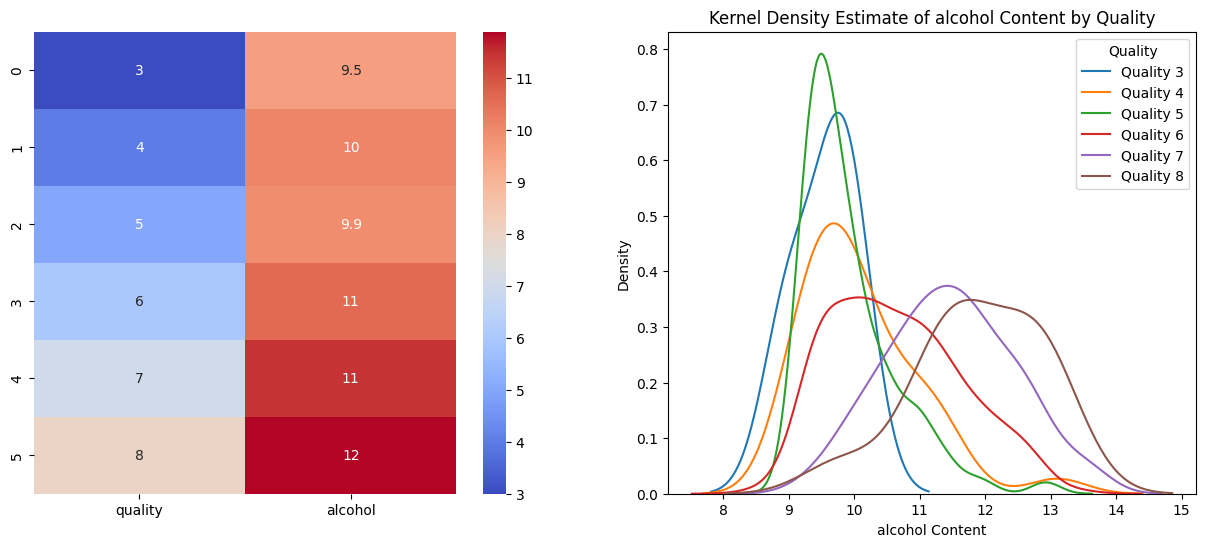

In [63]:
num_cat(df,'alcohol')

## quality to volatile acidity
conclusion
- Mostly people are 8 rating quality wine average 0.4 (approxmtly)
- genellary volatile acidity is decrease and wine qaulity increase

   quality  volatile acidity
0        3          0.773333
1        4          0.667353
2        5          0.566911
3        6          0.494757
4        7          0.402654
5        8          0.424167


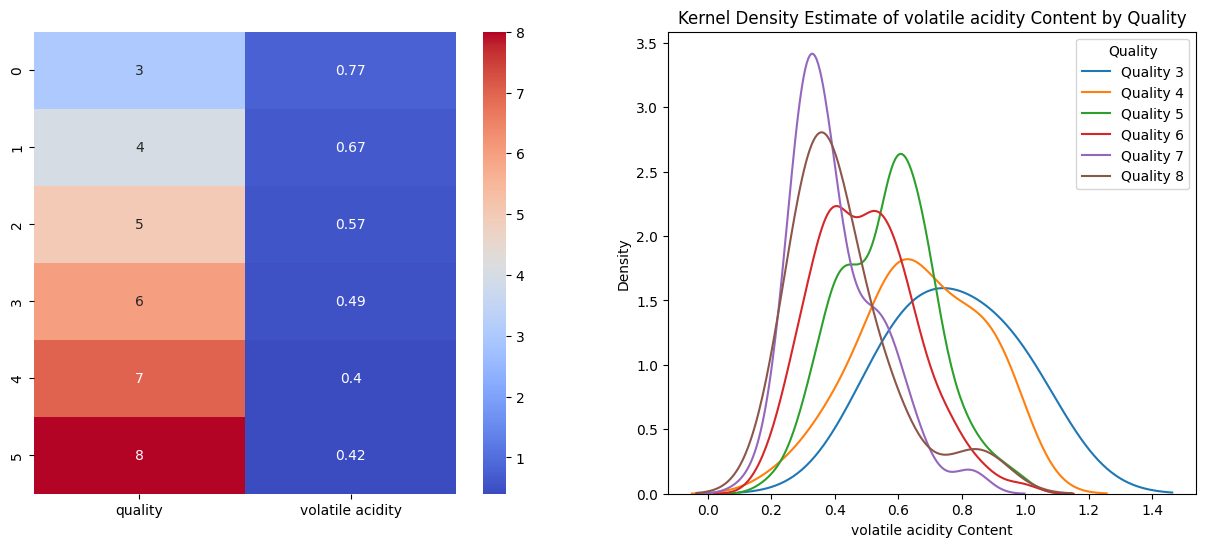

In [64]:
num_cat(df,'volatile acidity')

## quality to 'fixed acidity'
conclusion

   quality  fixed acidity
0        3       8.533333
1        4       7.935294
2        5       8.075973
3        6       8.296468
4        7       8.667692
5        8       8.683333


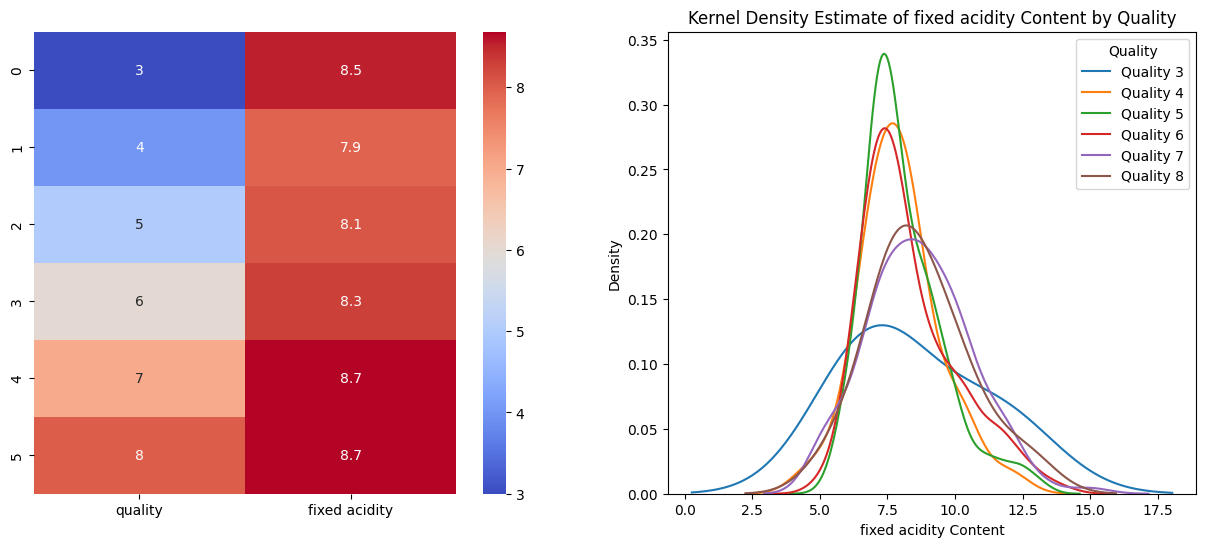

In [65]:
num_cat(df,'fixed acidity')

## quality to citric acid
conclusion
- mostly peoples are given the best rating to high citric acid wine 
- best wine quality rating is 8. and aveage citric acid around(0.399167)

   quality  citric acid
0        3     0.243333
1        4     0.167059
2        5     0.221693
3        6     0.265717
4        7     0.347000
5        8     0.399167


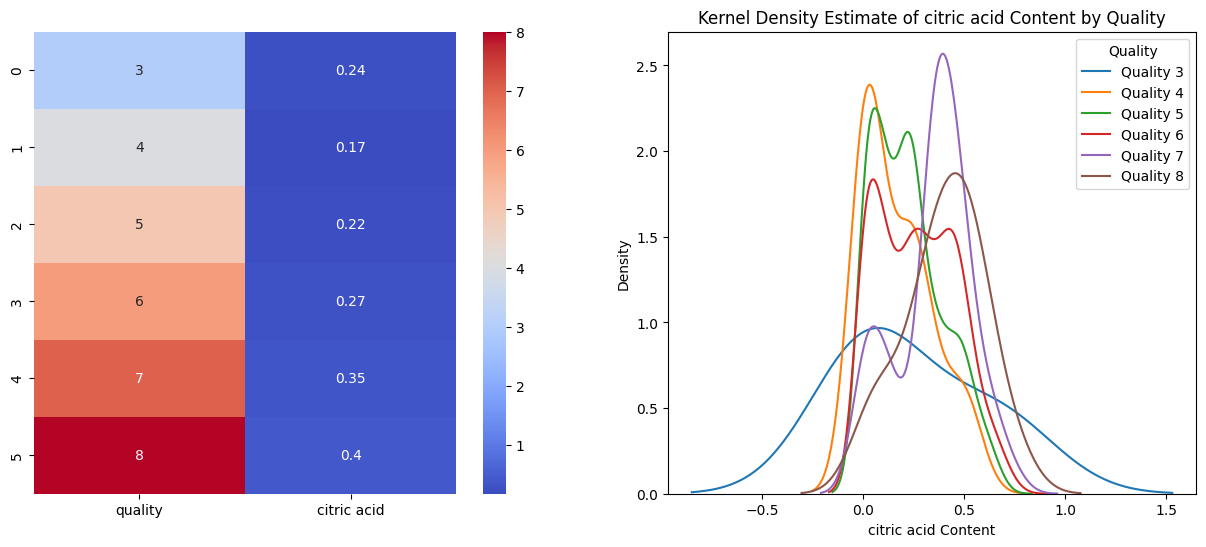

In [66]:
num_cat(df,'citric acid')

## quality  to residual sugar
conclusion
- there simullary residual sugar lavel.its little different but the residual sugar is increase and wine quality is increase

   quality  residual sugar
0        3        2.033333
1        4        2.129412
2        5        2.199428
3        6        2.186645
4        7        2.215769
5        8        2.225000


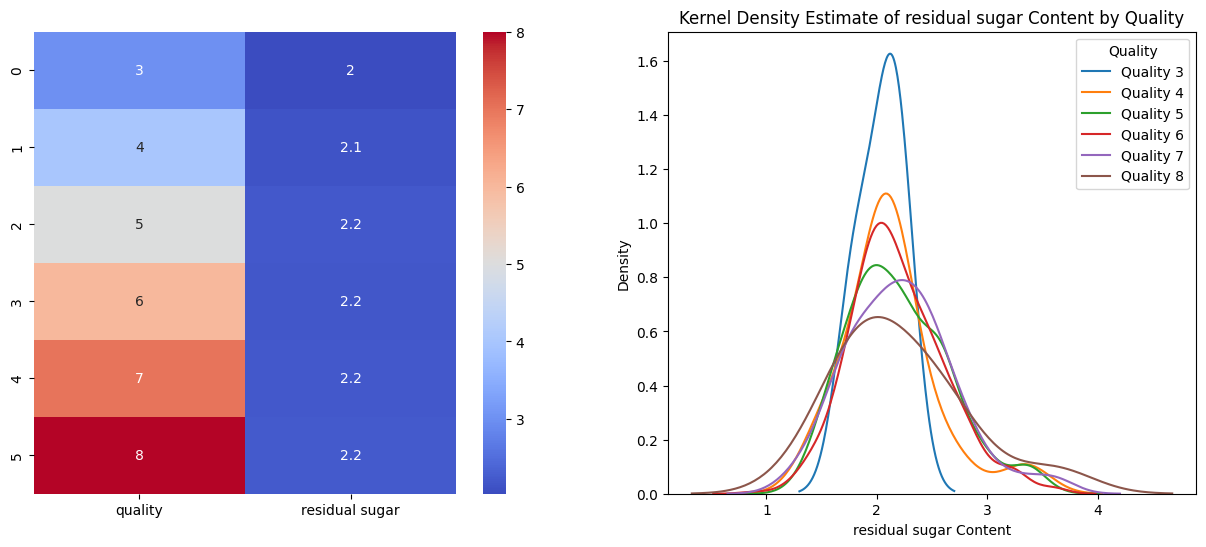

In [67]:
num_cat(df,'residual sugar')

In [68]:
df[df['quality'] == 8]['residual sugar'].mean()

2.225

## quality to chlorides
conclusion
- there simullary effect.powerfull effect on the graph no strong connection
- But the main think.high rating 8 chlorides average 0.7 (around) 

   quality  chlorides
0        3   0.071000
1        4   0.079412
2        5   0.081119
3        6   0.076464
4        7   0.072769
5        8   0.069833


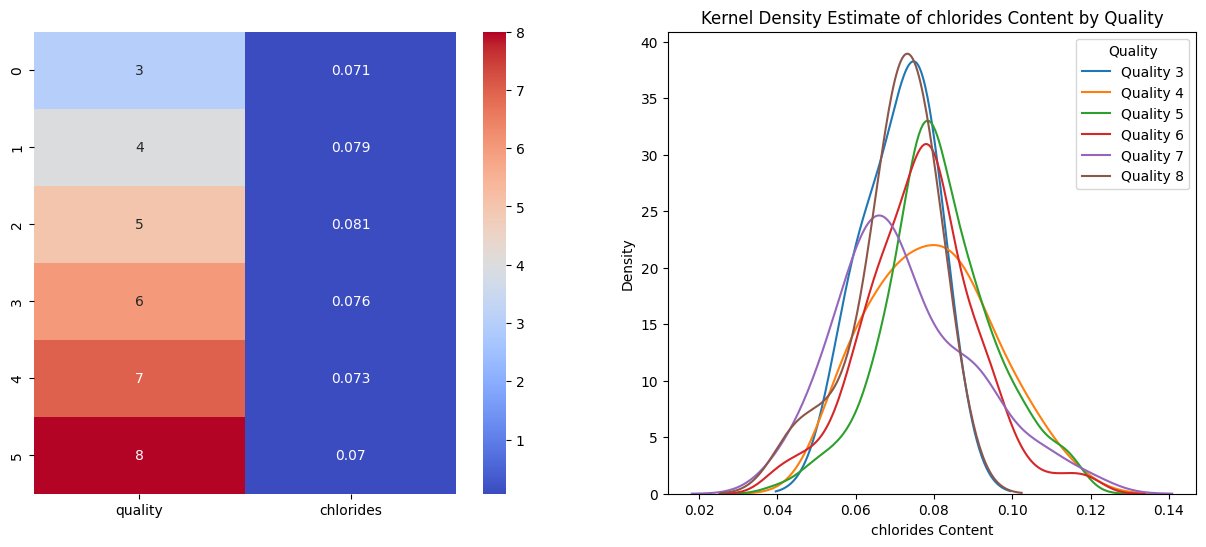

In [69]:
num_cat(df,'chlorides')

## conclusion
## quality vs free sulfur dioxide 
-  there are free sulfur dioxide quanlity less 12 is not good rating 
-  more than than free sulfur dioxide quanlity 13 is  good rating
## quality vs total sulfur dioxide
- there are total sulfur dioxide is round 33 (its best range) quantity.peoples are give hight rating
- look there total sulfur dioxide is < 33 the wine is wine quality is descrice and  more than >33 the wine quality is descrice 

   quality  free sulfur dioxide
0        3            12.000000
1        4             9.882353
2        5            15.462243
3        6            15.660044
4        7            14.476923
5        8            14.416667


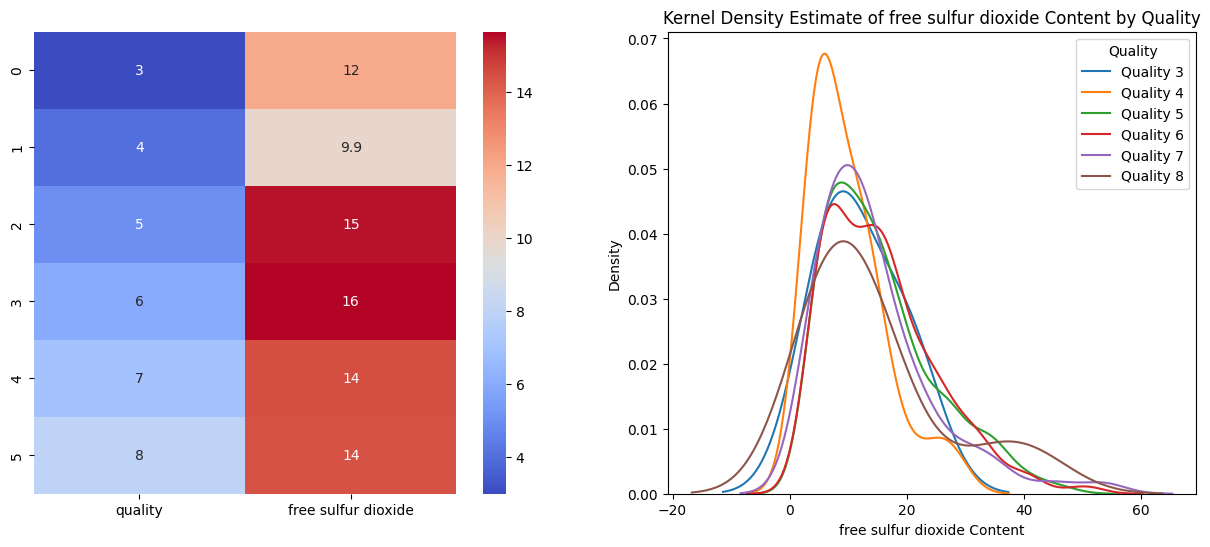


total sulfur dixide

   quality  total sulfur dioxide
0        3             36.000000
1        4             32.882353
2        5             48.267735
3        6             39.068433
4        7             33.407692
5        8             33.666667


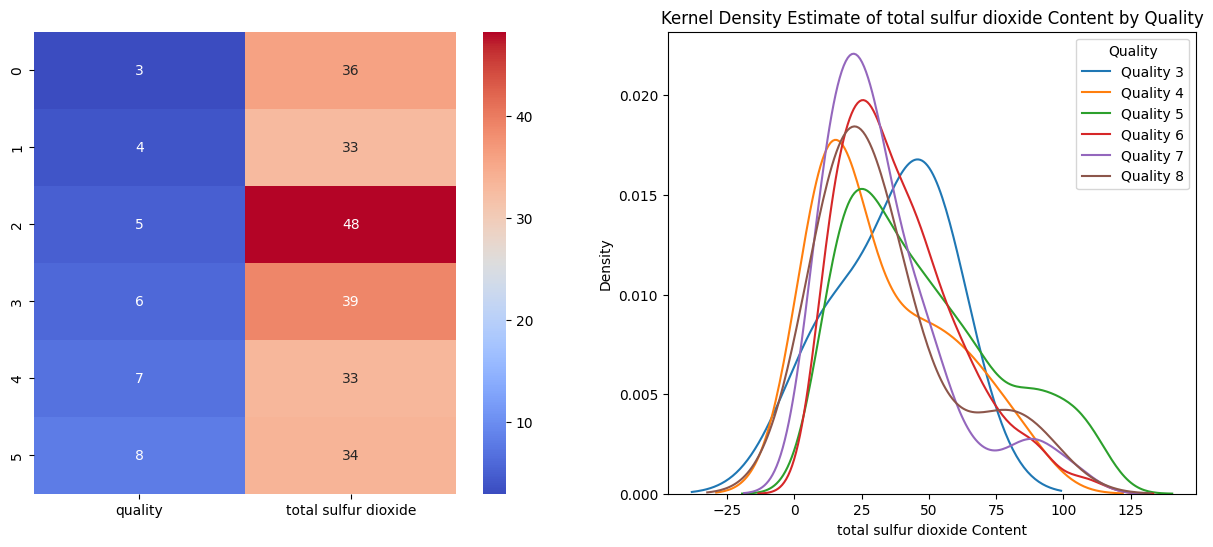

In [70]:
num_cat(df,'free sulfur dioxide')
print()
print(f'total sulfur dixide')
print()
num_cat(df,'total sulfur dioxide')

## quality to density
conclusion
-  there are density is decrease and the wine quality is increase
-  there high rate wine density is(0.995143) and main think is its very low density as compare other

   quality   density
0        3  0.997950
1        4  0.996745
2        5  0.996911
3        6  0.996445
4        7  0.995753
5        8  0.995143


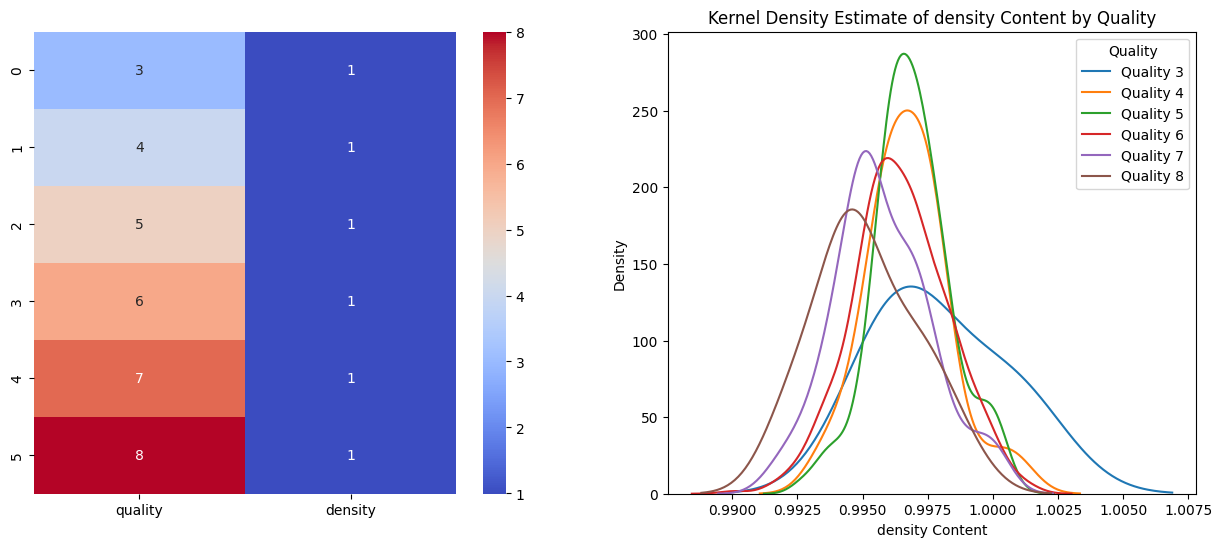

In [71]:
num_cat(df,'density')

In [72]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'fixed acidity 1'],
      dtype='object')

## quality to pH
conclusion
- mostly peoples are like the wine than pH value is low.

   quality        pH
0        3  3.370000
1        4  3.382353
2        5  3.320824
3        6  3.327064
4        7  3.306000
5        8  3.230000


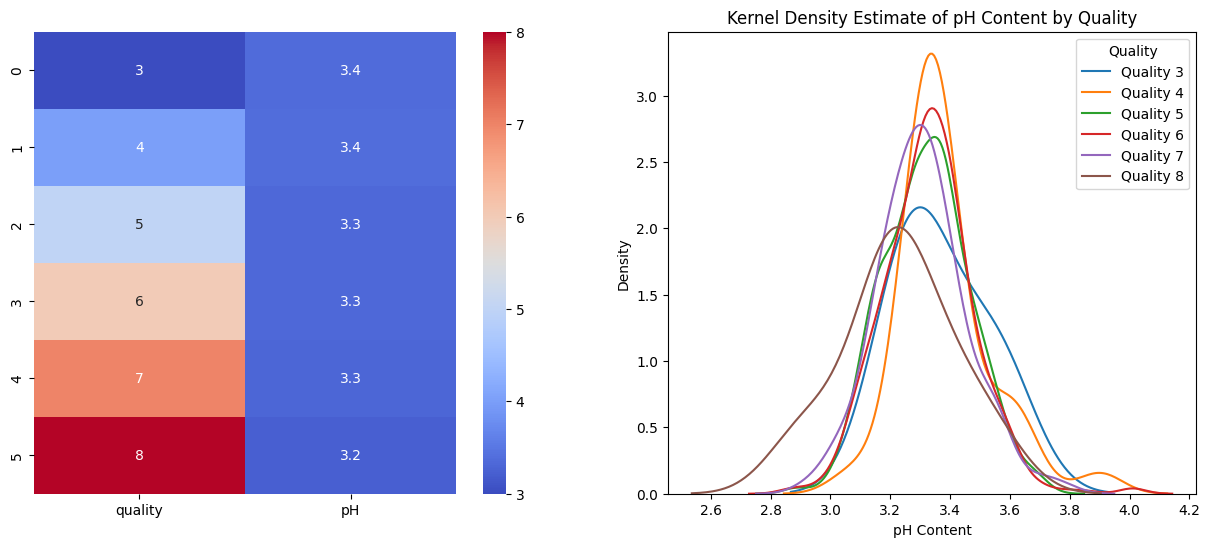

In [73]:
num_cat(df,'pH')

## quality to sulphates
conclusion
- there are sulpahtes is increase and wine quality in increase.give highly rating on high sulphates quantity
- highly rate wine sulpahtes quantity is (0.750000)
## quality to alcohol
conclusion
- there are alcohol is increase and wine increase.those wine give the hightest ratig of alcohol quantity is high

   quality  sulphates
0        3   0.583333
1        4   0.542059
2        5   0.589108
3        6   0.654570
4        7   0.734154
5        8   0.750000


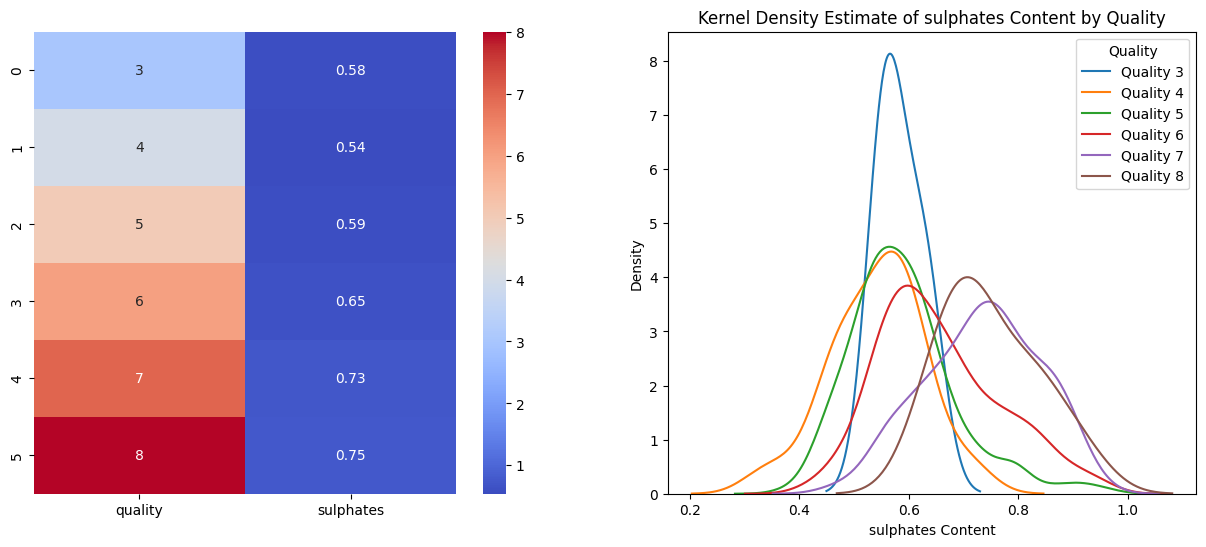

   quality    alcohol
0        3   9.550000
1        4  10.092647
2        5   9.911899
3        6  10.634327
4        7  11.463205
5        8  11.891667


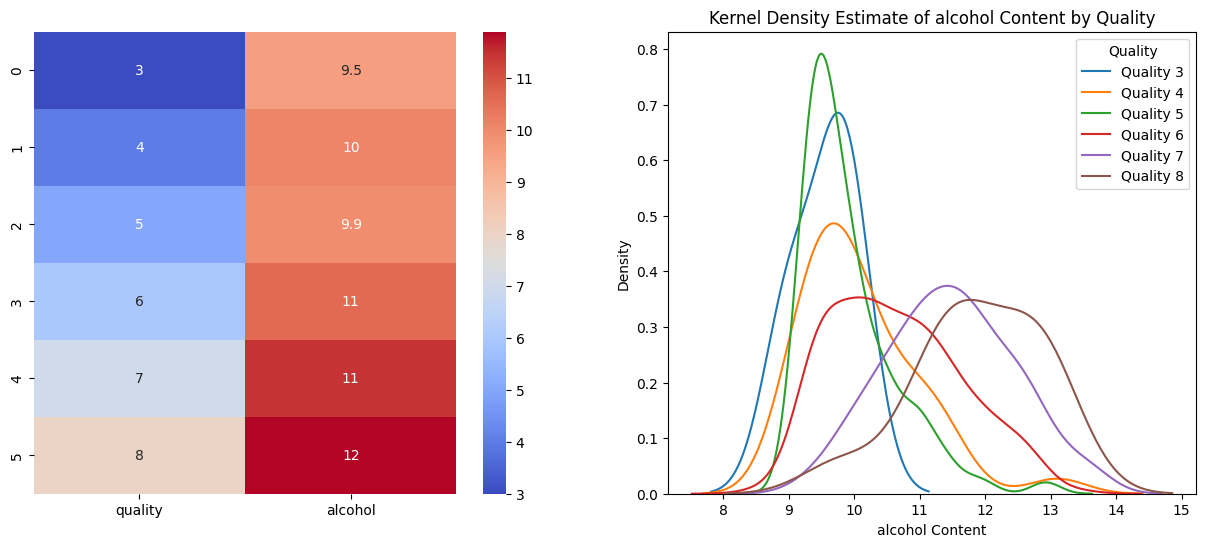

In [74]:
num_cat(df,'sulphates')

num_cat(df,'alcohol')

## feature engineering

In [77]:
df['sul+alc'] = df['sulphates'] + df['alcohol']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9256\3716332289.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity 1,sul+alc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7-8,9.96
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7-8,10.48
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7-8,10.45
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11-12,10.38
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,7-8,9.96


<Axes: >

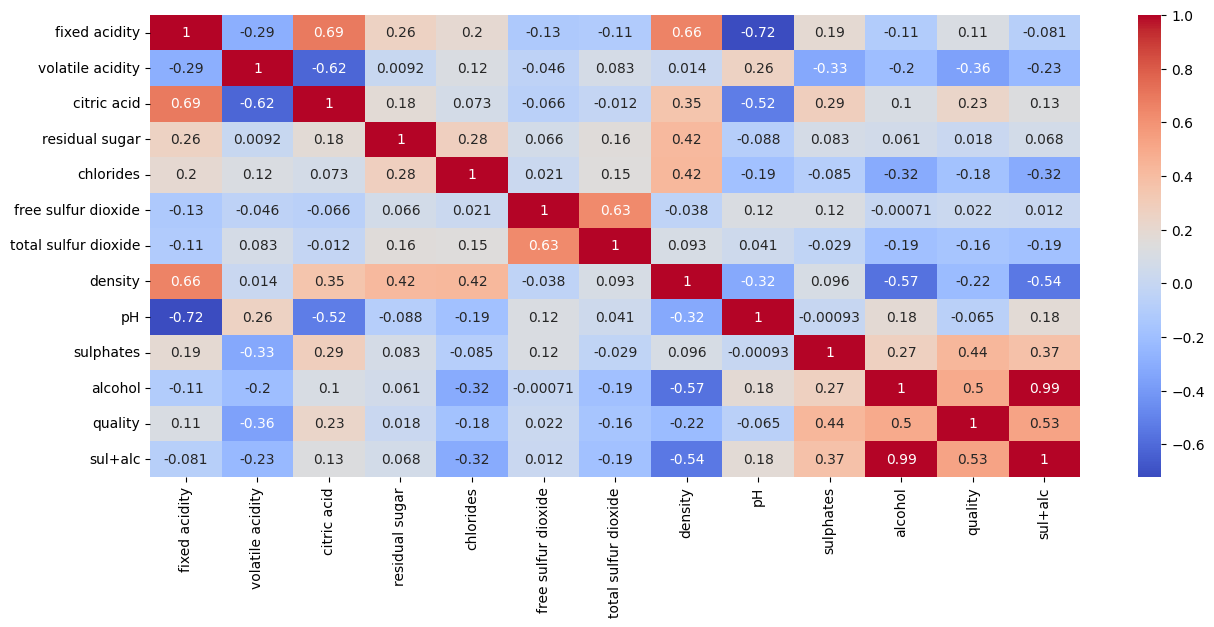

In [79]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap = 'coolwarm')

## quality to sul+alc
conclusion
- i have make a new column of combination of two sulphates + alcohol =  'sul+alc' 
-  finally i have anlysis the column and result is quality rating is low sul+alc is low 
- quality is high is sul+alc is high

   quality    sul+alc
0        3  10.133333
1        4  10.634706
2        5  10.501007
3        6  11.288896
4        7  12.197359
5        8  12.641667


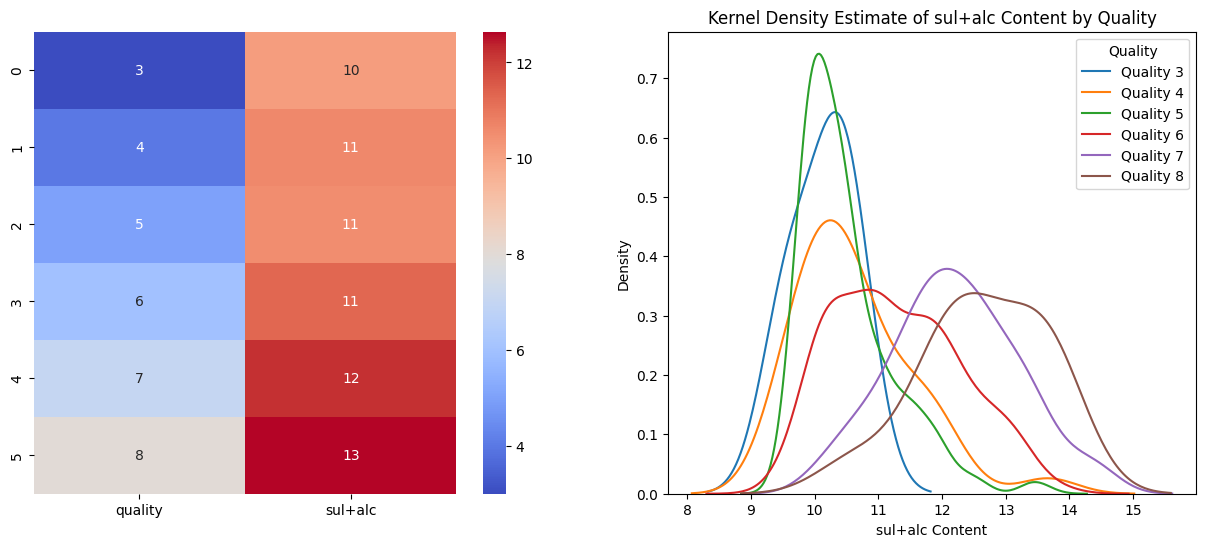

In [82]:
num_cat(df,'sul+alc')